## Introduction

This notebook contains the code for the Week 3 assignment. The assignment involves loading the Iris dataset, performing some basic data exploration, and implementing a k-Nearest Neighbors (k-NN) classifier from scratch. The notebook also includes visualizations to better understand the dataset.

## Importing Required Libraries

First, we import the necessary libraries for data manipulation, visualization, and machine learning.

In [1]:
import numpy as np  # helps for arrays and matrices
from sklearn import datasets  # Load iris_data set
import matplotlib.pyplot as plt  # support our visualization
from collections import Counter # for counting the number of occurrences of each item in the list

## Loading the Iris Dataset
We load the Iris dataset, which is a classic dataset used for classification tasks. The dataset contains 150 samples of iris flowers, with 4 features each (sepal length, sepal width, petal length, petal width) and the corresponding labels (species).

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
iris_data = iris.data  # Features (sepal length, sepal width, petal length, petal width)
iris_labels = iris.target  # Labels (0: setosa, 1: versicolor, 2: virginica)
iris_names = iris.target_names  # Names of the species

## Displaying Dataset Information

We display some basic information about the dataset, such as the number of samples, number of features, feature names, target names, and the number of samples for each species.

In [3]:
# Display the number of samples and the number of features
print(f"Number of samples: {iris_data.shape[0]}")
print(f"Number of features: {iris_data.shape[1]}")

# Display the feature_names
print(f"Feature names: {iris.feature_names}")

# Display the target names
print(f"Target names: {iris_names}")

# Display the number of samples for each species
species_count = Counter(iris_labels)
for i in range(len(iris_names)):
    print(f"{iris_names[i]}: {species_count[i]}")

# Display the data and the labels with the corresponding species
for i in range(len(iris_data)):
    print(f"{i + 1} - {iris_data[i]} - {iris_names[iris_labels[i]]}")

Number of samples: 150
Number of features: 4
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
setosa: 50
versicolor: 50
virginica: 50
1 - [5.1 3.5 1.4 0.2] - setosa
2 - [4.9 3.  1.4 0.2] - setosa
3 - [4.7 3.2 1.3 0.2] - setosa
4 - [4.6 3.1 1.5 0.2] - setosa
5 - [5.  3.6 1.4 0.2] - setosa
6 - [5.4 3.9 1.7 0.4] - setosa
7 - [4.6 3.4 1.4 0.3] - setosa
8 - [5.  3.4 1.5 0.2] - setosa
9 - [4.4 2.9 1.4 0.2] - setosa
10 - [4.9 3.1 1.5 0.1] - setosa
11 - [5.4 3.7 1.5 0.2] - setosa
12 - [4.8 3.4 1.6 0.2] - setosa
13 - [4.8 3.  1.4 0.1] - setosa
14 - [4.3 3.  1.1 0.1] - setosa
15 - [5.8 4.  1.2 0.2] - setosa
16 - [5.7 4.4 1.5 0.4] - setosa
17 - [5.4 3.9 1.3 0.4] - setosa
18 - [5.1 3.5 1.4 0.3] - setosa
19 - [5.7 3.8 1.7 0.3] - setosa
20 - [5.1 3.8 1.5 0.3] - setosa
21 - [5.4 3.4 1.7 0.2] - setosa
22 - [5.1 3.7 1.5 0.4] - setosa
23 - [4.6 3.6 1.  0.2] - setosa
24 - [5.1 3.3 1.7 0.5] - setosa
25 - [4.

## Visualizing the Iris Dataset
We create a scatter plot of the Iris dataset using all features combination to visualize the distribution of the all the species.

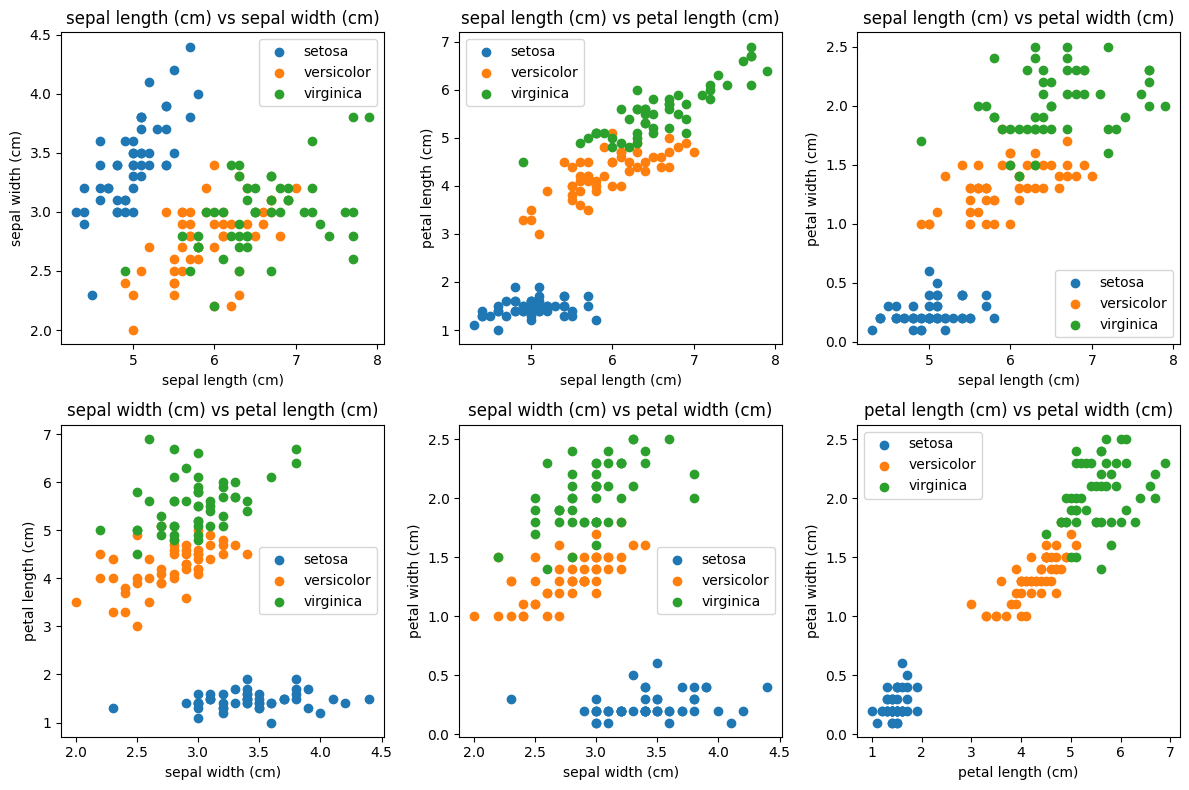

In [4]:
# Retrieve feature names from the Iris dataset
feature_names = iris.feature_names  

# Define all unique feature combinations for scatter plots (pairwise feature comparisons)
feature_combinations = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]  

# Create a figure for multiple scatter plots
plt.figure(figsize=(12, 8))  

# Loop through each feature combination and generate a scatter plot
for i, (x_idx, y_idx) in enumerate(feature_combinations, 1):
    plt.subplot(2, 3, i)  # Arrange plots in a 2-row, 3-column grid

    # Plot data points for each Iris species
    for j, name in enumerate(iris_names):
        plt.scatter(
            iris_data[iris_labels == j, x_idx],  # X-axis feature
            iris_data[iris_labels == j, y_idx],  # Y-axis feature
            label=name  # Assign label for legend
        )

    # Label the axes with corresponding feature names
    plt.xlabel(feature_names[x_idx])
    plt.ylabel(feature_names[y_idx])
    
    # Set the title for each subplot
    plt.title(f"{feature_names[x_idx]} vs {feature_names[y_idx]}")
    
    # Display the legend to differentiate species
    plt.legend()

# Adjust layout to prevent overlap and enhance readability
plt.tight_layout()

# Display all scatter plots
plt.show()

## Splitting the Dataset into Training and Test Sets

We split the dataset into a training set and a test set using a 68/32 split. The training set will be used to train the k-NN classifier, and the test set will be used to evaluate its performance.

In [5]:
# Set a random seed for reproducibility
np.random.seed(42)

# Create a randomized permutation of the indices of the dataset (150 samples)
indices = np.random.permutation(len(iris_data))

# Set the number of test samples to 48 for a 68/32 split of the data
n_test_samples = 48

# Split the data into training and test sets
trainset_data = iris_data[indices[:-n_test_samples]]  # Training data (92 samples)
trainset_labels = iris_labels[indices[:-n_test_samples]]  # Training labels
testset_data = iris_data[indices[-n_test_samples:]]  # Test data (48 samples)
testset_labels = iris_labels[indices[-n_test_samples:]]  # Test labels

## Implementing the k-Nearest Neighbors (k-NN) Classifier

We implement the k-NN classifier from scratch. The classifier will predict the species of the test samples based on the majority vote of the k-nearest neighbors in the training set.

In [6]:
# Function to calculate Euclidean distance between two points
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Function to perform k-Nearest Neighbors classification
def nearest_neighbors(train_data, train_labels, test_data, k=1):
    predictions = []
    for test_point in test_data:
        # Calculate distances between the test point and all training points
        distances = [euclidean_distance(test_point, train_point) for train_point in train_data]
        # Find the indices of the k nearest neighbors
        nearest_indices = np.argsort(distances)[:k]
        # Get the labels of the nearest neighbors
        nearest_labels = [train_labels[i] for i in nearest_indices]
        # Find the most common label among the nearest neighbors
        most_common = Counter(nearest_labels).most_common(1)[0][0]
        predictions.append(most_common)
    return predictions

# Predict the labels for the test set using k-NN with k=1
k = 1
predictions = nearest_neighbors(trainset_data, trainset_labels, testset_data, k)

## Evaluating the k-NN Classifier
We evaluate the performance of the k-NN classifier by calculating the overall accuracy and the accuracy for each type of iris.

In [7]:
# Calculate overall accuracy
correct = np.sum(predictions == testset_labels) # The number of correct predictions is obtained by comparing predicted labels with actual test labels
overall_accuracy = correct / len(testset_labels) # Compute overall accuracy as a proportion of correct predictions


accuracy_per_class = {} # Initialize a dictionary to store accuracy for each Iris species
for label in np.unique(testset_labels): # Loop through each unique class label in the test set
    correct_class = np.sum((predictions == label) & (testset_labels == label)) # Count correctly classified instances for the current class
    total_class = np.sum(testset_labels == label) # Count total instances of the current class in the test set
    accuracy_per_class[label] = correct_class / total_class # Calculate accuracy for the current class

# Print the overall accuracy of the model
print(f"Overall Accuracy: {overall_accuracy:.2f}")

# Print accuracy for each class (Setosa, Versicolor, Virginica)
for label, acc in accuracy_per_class.items():
    print(f"Accuracy for {iris_names[label]}: {acc:.2f}")

Overall Accuracy: 0.96
Accuracy for setosa: 1.00
Accuracy for versicolor: 0.94
Accuracy for virginica: 0.95


## Displaying Predictions vs Actual Labels
We display the predictions made by the k-NN classifier alongside the actual labels to see how well the classifier performed.

In [8]:
# Display the predictions vs actual labels
print("\nPredictions vs Actual Labels:")
for i in range(len(testset_labels)):
    print(f"Predicted: {iris_names[predictions[i]]}, Actual: {iris_names[testset_labels[i]]}")


Predictions vs Actual Labels:
Predicted: setosa, Actual: setosa
Predicted: virginica, Actual: versicolor
Predicted: virginica, Actual: virginica
Predicted: setosa, Actual: setosa
Predicted: virginica, Actual: virginica
Predicted: virginica, Actual: virginica
Predicted: setosa, Actual: setosa
Predicted: versicolor, Actual: versicolor
Predicted: versicolor, Actual: versicolor
Predicted: virginica, Actual: virginica
Predicted: versicolor, Actual: versicolor
Predicted: virginica, Actual: virginica
Predicted: setosa, Actual: setosa
Predicted: virginica, Actual: virginica
Predicted: versicolor, Actual: versicolor
Predicted: virginica, Actual: virginica
Predicted: versicolor, Actual: versicolor
Predicted: versicolor, Actual: versicolor
Predicted: versicolor, Actual: versicolor
Predicted: setosa, Actual: setosa
Predicted: versicolor, Actual: versicolor
Predicted: versicolor, Actual: versicolor
Predicted: setosa, Actual: setosa
Predicted: versicolor, Actual: versicolor
Predicted: virginica, Ac

We create a Bar chart to visualize the accuracy of the each Iris Species

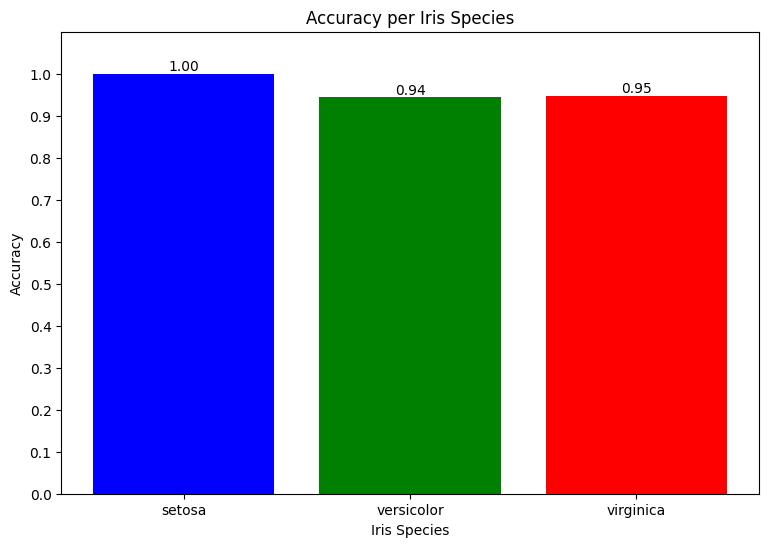

In [9]:
# Create a bar chart to visualize the accuracy of each Iris species
plt.figure(figsize=(9, 6))  # Set figure size for better readability

# Plot accuracy for each species as a bar chart
plt.bar(
    iris_names,  # X-axis labels (Iris species names)
    [accuracy_per_class[i] for i in range(len(iris_names))],  # Y-axis values (accuracy per class)
    color=['blue', 'green', 'red']  # Assign different colors to each species
)

# Label the axes
plt.xlabel('Iris Species')
plt.ylabel('Accuracy')

plt.title('Accuracy per Iris Species') # Set the title of the bar chart
plt.ylim(0, 1.1) # Set y-axis limits slightly above 1 for better visualization
plt.yticks(np.arange(0, 1.1, 0.1)) # Define y-axis ticks at 0.1 intervals for better granularity

# Display accuracy values on top of the bars
for i, acc in enumerate([accuracy_per_class[i] for i in range(len(iris_names))]):
    plt.text(i, acc, f"{acc:.2f}", ha='center', va='bottom', color='black')  # Position text above bars

# Show the final plot
plt.show()


## Conclusion
In this notebook, we loaded the Iris dataset, performed some basic data exploration, and implemented a k-Nearest Neighbors (k-NN) classifier from scratch. We evaluated the classifier's performance and visualized the dataset to better understand the distribution of the different species. The k-NN classifier achieved an overall accuracy of 96%, with high accuracy for each species: 100% for setosa, 94% for versicolor, and 95% for virginica.